<a href="https://colab.research.google.com/github/art-python/MSDeakin/blob/SIG720-MachineLearning/SIG720_TaskP2_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem1**
### Load the "housing.csv" dataset. Split the dataset in train and test set (use your choice of splitting). Train a linear regression model and report the performance (use your choice of at least 4 performance metric).

In [2]:
#import important libraries
import pandas as pd               #import Pandas package
import numpy as np                #import Numpy package
import matplotlib.pyplot as plt   #import Matplotlib package
import seaborn as sns             #import Seaborn package
%matplotlib inline

In [3]:
# Import the file from google drive, mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset file and read the csv
folder_path = "/content/drive/MyDrive/MSDeakin/SIG720-MachineLearning/"
file_name = "housing.csv"

# Load the CSV file into a DataFrame
dataset = pd.read_csv(folder_path + file_name)

Overview of dataset

In [5]:
#overview of the dataset
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Data Description:

*   CRIM: Per capita crime rate by town
*   ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
*   INDUS: Proportion of non-retail business acres per town
*   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX: Nitric oxide concentration (parts per 10 million)
*   RM: Average number of rooms per dwelling
*   AGE: Proportion of owner-occupied units built prior to 1940
*   DIS: Weighted distances to five Boston employment centers
*   RAD: Index of accessibility to radial highways
*   TAX: Full-value property tax rate per $10,000

*   PTRATIO: Pupil-teacher ratio by town
*  B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
*   LSTAT: Percentage of lower status of the population
*   MEDV: Median value of owner-occupied homes in $1000s



















In [6]:
#check the dataset shape
dataset.shape

(506, 14)

In [7]:
#check dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    CRIM     506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
#staistical summary of the dataset
dataset.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [9]:
#copying the original file to another variable before starting any work.
df = dataset.copy()

In [10]:
# Checking for duplicate values
df.duplicated().sum()

0

* has no duplicate rows

In [11]:
# Checking for missing values
df.isnull().sum()

 CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
dtype: int64

* has no missing values

In [12]:
#Get the names of features present in the dataset.
df.columns

Index([' CRIM', ' ZN', ' INDUS', ' CHAS', ' NOX', ' RM', ' AGE', ' DIS',
       ' RAD', ' TAX', ' PTRATIO', ' B', ' LSTAT', ' MEDV'],
      dtype='object')

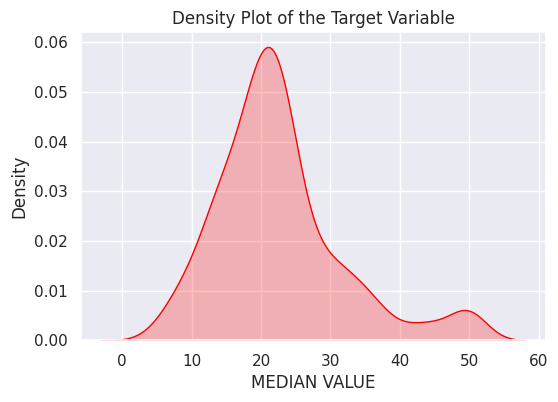

In [16]:
#check the distribution plot of the target variable
plt.figure(figsize=(6, 4))
sns.kdeplot(df[' MEDV'], fill=True, color='red')
plt.xlabel('MEDIAN VALUE')
plt.ylabel('Density')
plt.title('Density Plot of the Target Variable')
plt.show()

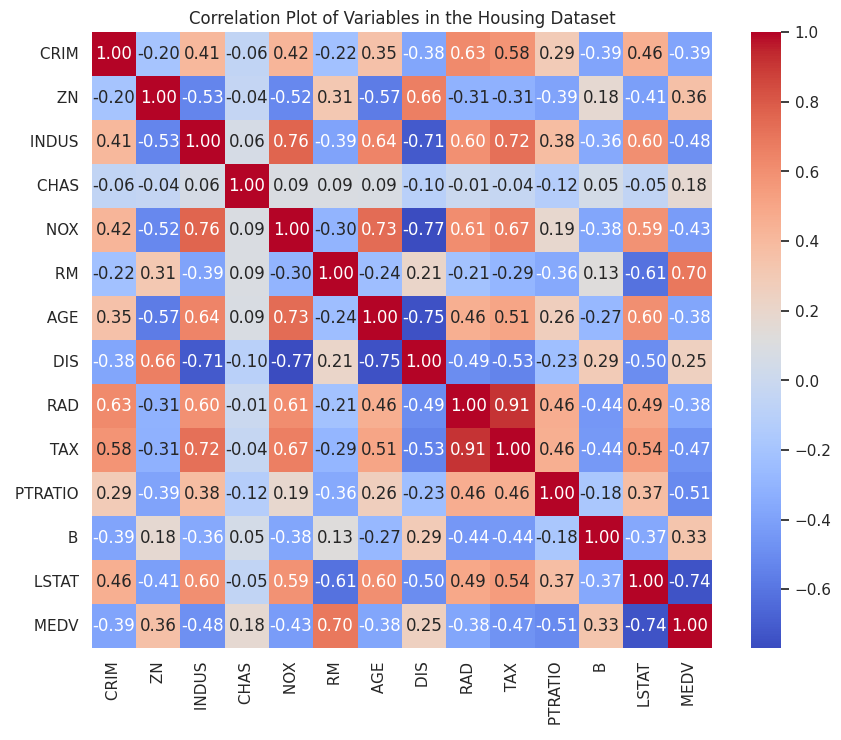

In [18]:
#Plot the correlation matrix as a heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot of Variables in the Housing Dataset')
plt.show()

In [19]:
#Lets go for the split of the dataset
from sklearn.model_selection import train_test_split

#Split the dataset into features (X) and target (y)
X = df.drop(' MEDV', axis=1)  # Replace "target_column" with the actual target column name
y = df[' MEDV']  # Replace "target_column" with the actual target column name

In [20]:
#Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Import LinearRegression library from Sklearn package
from sklearn.linear_model import LinearRegression

#Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
#Make predictions on the test set
y_pred = model.predict(X_test)

In [23]:
#import metrics for measuring performance of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Step 6: Report performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

In [24]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Explained Variance Score (EVS):", evs)

Mean Absolute Error (MAE): 3.189091965887837
Mean Squared Error (MSE): 24.291119474973478
R-squared (R2): 0.6687594935356326
Explained Variance Score (EVS): 0.6695178614705706


## **Problem 2**
### Apply PCA and compare the performance with Q1. Compare the performance of this model with the performance obtained in Q1. Explain the outcome.

In [25]:
#To apply PCA import PCA from Sklearn
from sklearn.decomposition import PCA

In [ ]:
#Apply PCA and select the first three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [ ]:
#Split the dataset into train and test sets (same as in Q1)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
#Train a linear regression model using the transformed features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
#Make predictions on the test set using PCA-transformed features
y_pred_pca = model_pca.predict(X_test_pca)

In [ ]:
#Report performance metrics using PCA-transformed features
mae_pca = mean_absolute_error(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
evs_pca = explained_variance_score(y_test, y_pred_pca)

In [ ]:
#Print the results
print("Mean Absolute Error (MAE) with PCA:", mae_pca)
print("Mean Squared Error (MSE) with PCA:", mse_pca)
print("R-squared (R2) with PCA:", r2_pca)
print("Explained Variance Score (EVS) with PCA:", evs_pca)

Mean Absolute Error (MAE) with PCA: 4.99405190707241
Mean Squared Error (MSE) with PCA: 47.20285466952181
R-squared (R2) with PCA: 0.3563286573348259
Explained Variance Score (EVS) with PCA: 0.36839087085050093


## **Problem 3**
### Load "IRIS " datasets from SKlearn. Apply PCA on the dataset and select the first three principal components. Split the dataset in train and test set (use your choice of splitting). Train a logistic regression model and report the performance (use your choice of at least 4 performance metric)

In [73]:
#Import Iris dataset from Sklearn
from sklearn.datasets import load_iris

In [75]:
# Load the IRIS dataset and divide the dataset into X & y
iris = load_iris()

# Convert the data and target to a DataFrame
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target, columns=["target"])

In [76]:
#Overview of dataset
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
#Import libararies for Logistic Regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Apply PCA and select the first three principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [ ]:
#Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
#Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
#Report performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
#Print the result
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## **Problem 4**
### Apply L1 or L2 regulariser on the logistic regression model developed using the same train and test data used in Q3 and calculate performance of the new model. Compare performance of this model with the performance reported in Q3. Explain the outcome.

In [ ]:
#Train a logistic regression model with L1 (Lasso) or L2 (Ridge) regularization
# Let's choose L1 regularization for this case
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
#Make predictions on the test set using the L1 regularized model
y_pred_l1 = model_l1.predict(X_test)

In [ ]:
#Report performance metrics for the L1 regularized model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
precision_l1 = precision_score(y_test, y_pred_l1, average='weighted')
recall_l1 = recall_score(y_test, y_pred_l1, average='weighted')
f1_l1 = f1_score(y_test, y_pred_l1, average='weighted')

In [ ]:
#Print the results
print("Accuracy with L1 Regularization:", accuracy_l1)
print("Precision with L1 Regularization:", precision_l1)
print("Recall with L1 Regularization:", recall_l1)
print("F1 Score with L1 Regularization:", f1_l1)

Accuracy with L1 Regularization: 0.9666666666666667
Precision with L1 Regularization: 0.9694444444444444
Recall with L1 Regularization: 0.9666666666666667
F1 Score with L1 Regularization: 0.9664109121909632


## **Problem 5**
### Load "digits" datasets from SKlearn and print the dimension of the dataset. Apply PCA on the dataset and select first three components. Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s.

In [65]:
#import digit dataset from sklearn
from sklearn.datasets import load_digits

In [66]:
#Load the "digits" dataset
digits = load_digits()

In [67]:
# Convert the data and target to a DataFrame
X = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target, columns=["target"])

In [68]:
#Print the dimension of the original dataset
print("Dimension of the original dataset:", X.shape)

Dimension of the original dataset: (1797, 64)


In [69]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [70]:
# Import PCA from SKlearn
from sklearn.decomposition import PCA

# Apply PCA and select the first three components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Print the dimension of the modified dataset after PCA
print("Modified Dataset Dimension after PCA:", X_pca.shape)

Modified Dataset Dimension after PCA: (1797, 3)


<ipython-input-71-0a7d8698b17d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-71-0a7d8698b17d>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c=colors[i], cmap='tab10')


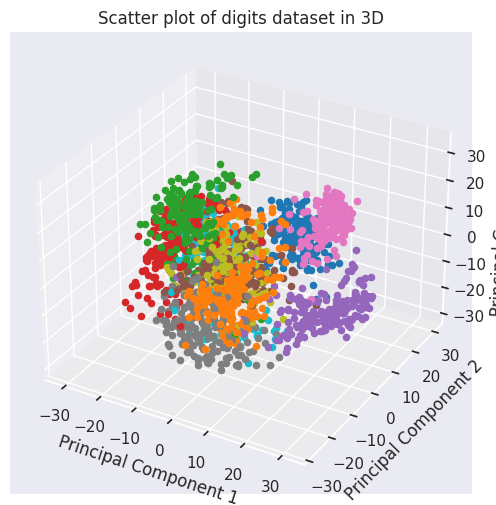

In [71]:
# Step 5: Visualize the data in 3D using a scatter plot

cmap = get_cmap('tab10')
colors = cmap(y / np.max(y))  # Normalize target values to fit the colormap

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X_pca)):
    ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c=colors[i], cmap='tab10')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Scatter plot of digits dataset in 3D')

plt.show()

## **Problem 6**
### Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters.

In [ ]:
#Import SVM from Sklearn
from sklearn.svm import SVC

In [ ]:
#Select appropriate data splitting approach (e.g., train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
#Train an SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

#Train the SVM model on the training data
svm_model.fit(X_train, y_train)

In [ ]:
#Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
#Report performance metrics and model hyperparameters
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
#Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7638888888888888
Precision: 0.7821197327379016
Recall: 0.7638888888888888
F1 Score: 0.757163503793496


In [ ]:
#Print the used model hyperparameters
print("SVM Model Hyperparameters:")
print("Kernel:", svm_model.kernel)
print("C (Regularization Parameter):", svm_model.C)
print("Gamma (Kernel Coefficient):", svm_model.gamma)

SVM Model Hyperparameters:
Kernel: rbf
C (Regularization Parameter): 1.0
Gamma (Kernel Coefficient): scale


## **Problem 7**
### Load "diabetes" datasets from SKlearn and print the dimension of the dataset. Apply tSNE method to reduce dimension and select first three components. Plot the selected components using appropriate visualisation technique.

In [48]:
# Import diabetes dataset from Sklearn
from sklearn.datasets import load_diabetes

In [49]:
# Load the "diabetes" dataset
diabetes = load_diabetes()


# Convert the data and target to a DataFrame
X = pd.DataFrame(diabetes.data)
y = pd.DataFrame(diabetes.target, columns=["target"])

In [50]:
# Print the dimension of the original dataset
print("Dimension of the original dataset:", X.shape)

Dimension of the original dataset: (442, 10)


In [51]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Apply t-SNE and select the first three components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

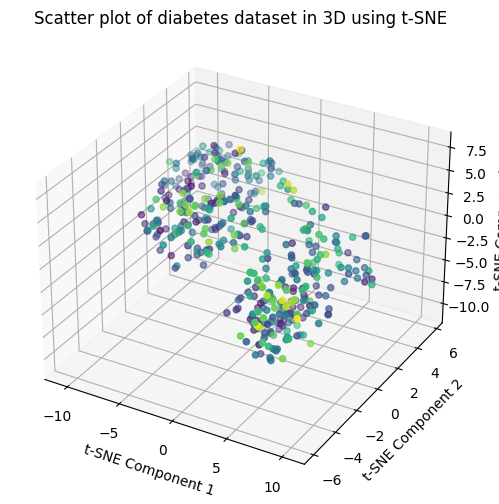

In [ ]:
# Plot the selected components using a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis')

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('Scatter plot of diabetes dataset in 3D using t-SNE')

plt.show()

## **Problem 8**
### Create a model for detecting diabetes using SVM with a poly kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyperparameters.

In [ ]:
# Load the dataset and apply t-SNE (which is already done in Problem 7)

# Select appropriate data splitting approach (e.g., train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

In [ ]:
# Train an SVM model with a polynomial kernel
svm_model_poly = SVC(kernel='poly')

# Train the SVM model on the training data
svm_model_poly.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred_poly = svm_model_poly.predict(X_test)

In [ ]:
# Step 6: Report performance metrics and model hyperparameters
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')

In [ ]:
# Print the results without hyperparameters
print("Accuracy with Polynomial Kernel:", accuracy_poly)
print("Precision with Polynomial Kernel:", precision_poly)
print("Recall with Polynomial Kernel:", recall_poly)
print("F1 Score with Polynomial Kernel:", f1_poly)

Accuracy with Polynomial Kernel: 0.0
Precision with Polynomial Kernel: 0.0
Recall with Polynomial Kernel: 0.0
F1 Score with Polynomial Kernel: 0.0


In [ ]:
# Step 7: Print the used model hyperparameters
print("SVM Model Hyperparameters with Polynomial Kernel:")
print("Kernel:", svm_model_poly.kernel)
print("C (Regularization Parameter):", svm_model_poly.C)
print("Degree (Polynomial Degree):", svm_model_poly.degree)

SVM Model Hyperparameters with Polynomial Kernel:
Kernel: poly
C (Regularization Parameter): 1.0
Degree (Polynomial Degree): 3


## **Problem 9**
### Based on the model hyper-parameters used in Q6 and Q8, share your understanding of hyperparameters tuning in ML model development

Machine learning models need hyperparameter adjustment to boost performance and generalisation. SVM models with RBF and polynomial kernels were employed in tasks 6 and 8. SVM hyperparameters were:


* 1. C (Regularization Parameter): It controls the margin-classification error trade-off. Smaller C values allow for more misclassified data points and underfitting. Larger C values reduce misclassifications and margins but may induce overfitting.

* 2. Gamma (Kernel Coefficient, RBF kernel): Each training example's effect. A lesser gamma value causes underfitting, while a bigger one causes overfitting.

* 3. Degree (Polynomial Degree, for polynomial kernel): It determines the kernel function's polynomial degree. High-degree polynomials can capture complicated feature interactions, but overfitting may occur.

Hyperparameter tweaking entails finding the ideal hyperparameters for model performance. Hyperparameter tweaking methods include:

* Grid Search: This method trains and evaluates the model for each hyperparameter value. The best combination wins.

* Random Search: Like grid search, but randomly samples hyperparameter values from predefined ranges. In huge search spaces, this method may be more efficient.

* Bayesian Optimisation: This advanced method uses probabilistic models to choose the next hyperparameters to evaluate depending on past outcomes. Grid or random search may be less efficient.

* Cross-Validation: Cross-validation is used with hyperparameter tuning to improve model performance estimates for each hyperparameter combination.

Hyperparameter tuning helps us fine-tune models for unseen data and avoid overfitting. Choose hyperparameters to balance underfitting and overfitting. Hyperparameter adjustment also depends on data size, representativeness, problem complexity, and computational resources.